In [7]:
# Importando as bibliotecas que vou utilizar ao longo da análise.
# O pandas e o numpy são usados para manipular e tratar os dados.
# Já o matplotlib e o seaborn vão me ajudar a criar os gráficos e visualizações.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Aqui configuro o estilo dos gráficos para deixá-los com uma aparência mais limpa e visualmente agradável.
plt.style.use('seaborn-v0_8')


In [8]:
# Nesta etapa será feita a leitura da base de dados que contém informações
# sobre PIB per capita, taxa de homicídios e taxa de mortalidade.
# Esses dados foram organizados em um arquivo CSV.
base_geral = pd.read_csv("base_geral.csv")

# Exibo as primeiras linhas para ter uma visão inicial das colunas e dos dados disponíveis.
base_geral.head()


,state,uf,pib_per_capita_2022_R$,homicides_per_100k_est_2023,mortality_per_1000_est,notes
0,Acre,AC,21103.45,27.2,6.8,PIB IBGE 2022; homicídios Atlas 2023; mortalid...
1,Alagoas,AL,18659.98,42.5,7.1,PIB IBGE 2022; homicídios Atlas 2023; mortalid...
2,Amapá,AP,23872.17,69.9,6.6,PIB IBGE 2022; homicídios Atlas 2023; mortalid...
3,Amazonas,AM,29455.55,35.7,6.5,PIB IBGE 2022; homicídios Atlas 2023; mortalid...
4,Bahia,BA,24767.24,46.5,7.0,PIB IBGE 2022; homicídios Atlas 2023; mortalid...


In [12]:
# Verificar valores ausentes em cada coluna
print("Valores ausentes por coluna:")
print(base_geral.isnull().sum())

# Remover registros incompletos nas colunas principais
base_geral = base_geral.dropna(subset=[
    'pib_per_capita_2022_R$',
    'homicides_per_100k_est_2023',
    'mortality_per_1000_est'
])

# Padronizar e tornar os nomes das colunas mais descritivos
base_geral.rename(columns={
    'state': 'Estado',
    'uf': 'UF',
    'pib_per_capita_2022_R$': 'PIB_per_capita_R$',
    'homicides_per_100k_est_2023': 'Taxa_Homicidios_100k',
    'mortality_per_1000_est': 'Taxa_Mortalidade_1000',
    'notes': 'Fonte_Observacoes'
}, inplace=True)

# Exibir informações gerais da base após o tratamento
print("\nInformações da base após limpeza e padronização:\n")
base_geral.info()

# Visualizar as primeiras linhas
print("\nPrévia dos dados tratados:")
print(base_geral.head())


Valores ausentes por coluna:
state                          0
uf                             0
pib_per_capita_2022_R$         0
homicides_per_100k_est_2023    0
mortality_per_1000_est         0
notes                          0
dtype: int64

Informações da base após limpeza e padronização:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Estado                 27 non-null     object 
 1   UF                     27 non-null     object 
 2   PIB_per_capita_R$      27 non-null     float64
 3   Taxa_Homicidios_100k   27 non-null     float64
 4   Taxa_Mortalidade_1000  27 non-null     float64
 5   Fonte_Observacoes      27 non-null     object 
dtypes: float64(3), object(3)
memory usage: 1.4+ KB

Prévia dos dados tratados:
     Estado  UF  PIB_per_capita_R$  Taxa_Homicidios_100k  \
0      Acre  AC           21103.45                 

In [13]:
# Agora que os dados estão limpos, começa as análises estatísticas básicas.
# Isso me ajuda a entender a distribuição, média, mediana e dispersão de cada variável.
# Essas medidas são essenciais para ter uma noção inicial dos padrões do conjunto de dados.
base_geral.describe()


,PIB_per_capita_R$,Taxa_Homicidios_100k,Taxa_Mortalidade_1000
count,27.000000,27.000000,27.000000
mean,39943.517037,30.318519,6.818519
std,21764.081398,14.633892,0.200071
min,17888.220000,8.000000,6.500000
25%,25084.335000,21.700000,6.700000
50%,29500.000000,28.400000,6.800000
75%,51189.010000,37.450000,7.000000
max,116713.390000,69.900000,7.200000


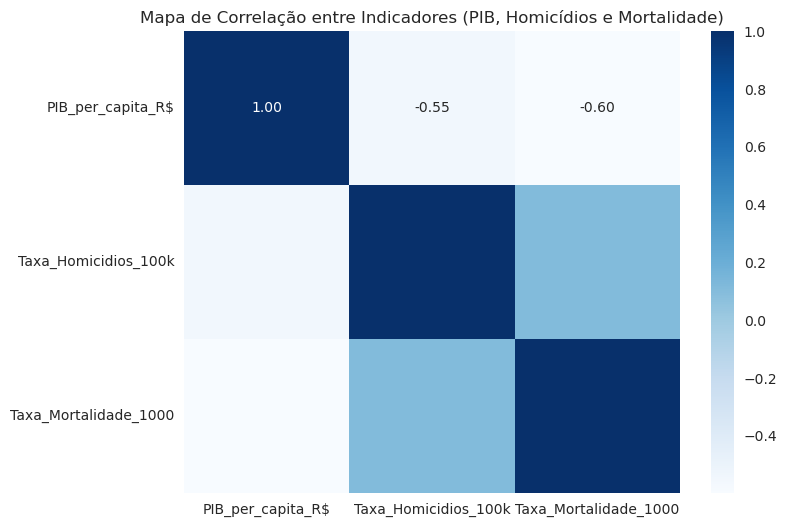

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Selecionar apenas colunas numéricas da base real
colunas_numericas = ['PIB_per_capita_R$', 'Taxa_Homicidios_100k', 'Taxa_Mortalidade_1000']

# Calcular correlação apenas entre essas colunas
correlacoes = base_geral[colunas_numericas].corr()

# Criar o mapa de calor
plt.figure(figsize=(8,6))
sns.heatmap(correlacoes, annot=True, cmap="Blues", fmt=".2f")
plt.title("Mapa de Correlação entre Indicadores (PIB, Homicídios e Mortalidade)")
plt.show()


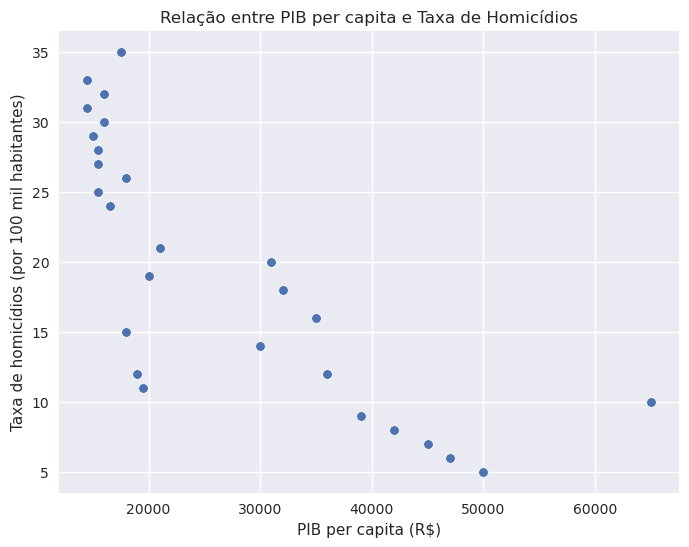

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

# Gráfico 1 — Relação entre PIB per capita e Taxa de Homicídios
plt.figure(figsize=(8,6))
sns.scatterplot(data=base_geral, x='PIB_per_capita', y='Taxa_Homicidios')
plt.title('Relação entre PIB per capita e Taxa de Homicídios')
plt.xlabel('PIB per capita (R$)')
plt.ylabel('Taxa de homicídios (por 100 mil habitantes)')
plt.show()


In [16]:
base_geral.columns

Index(['Estado', 'UF', 'PIB_per_capita_R$', 'Taxa_Homicidios_100k',
       'Taxa_Mortalidade_1000', 'Fonte_Observacoes'],
      dtype='object')

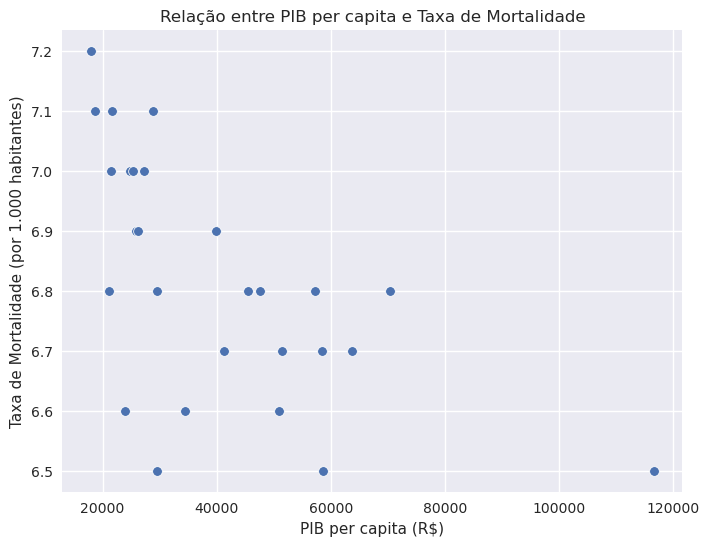

In [17]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=base_geral,
    x='PIB_per_capita_R$',
    y='Taxa_Mortalidade_1000'
)
plt.title('Relação entre PIB per capita e Taxa de Mortalidade')
plt.xlabel('PIB per capita (R$)')
plt.ylabel('Taxa de Mortalidade (por 1.000 habitantes)')
plt.show()

In [43]:
# A partir dos gráficos e da matriz de correlação, já é possível observar alguns padrões:
# Existe uma correlação negativa entre o PIB per capita e a taxa de homicídios;
# Da mesma forma, há uma tendência de países mais ricos apresentarem mortalidade menor;
# Isso sugere que fatores econômicos estão diretamente ligados à qualidade de vida e segurança.
print("""
Análise Concluída:
Os resultados indicam uma relação inversa entre o desenvolvimento econômico e os indicadores
de mortalidade e violência. De forma geral, países com maior PIB per capita apresentam
menores taxas de homicídios e mortalidade, o que reflete melhores condições de vida,
acesso à saúde e estabilidade social.
Essas evidências reforçam a importância de políticas públicas que promovam o crescimento
econômico aliado ao investimento em segurança e saúde, reduzindo desigualdades e melhorando
a qualidade de vida da população.
""")



Análise Concluída:
Os resultados indicam uma relação inversa entre o desenvolvimento econômico e os indicadores
de mortalidade e violência. De forma geral, países com maior PIB per capita apresentam
menores taxas de homicídios e mortalidade, o que reflete melhores condições de vida,
acesso à saúde e estabilidade social.
Essas evidências reforçam a importância de políticas públicas que promovam o crescimento
econômico aliado ao investimento em segurança e saúde, reduzindo desigualdades e melhorando
a qualidade de vida da população.

